## Final Project
Jean Guo

#### Premise: 

Due to a lack of long term PM2.5 records, uncertainties in emissions, and complexities with aerosol chemistry, we currently lack a full understanding of how strongly aerosols can be expected to respond from year to year due solely to internal variability, independent of changing emissions.

I am using 400 years of a control run held at 2005 emissions levels from the GFDL CM3 model to see how much PM2.5 can be expected to change independent of emissions changes.
1) Read in net CDF files

2) Examine the control run

    a. Monthly mean  

    b. Standard deviation

    c. Range

3) Comparison with RCP 8.5 scenario where emisions are held constant, but the aerosol precursors decline 

### Read in the files

In [70]:
# Import packages 
import numpy as np
import pandas as pd
import dask.array as da
from matplotlib import pyplot as plt
import xarray as xr
%matplotlib inline
# Set universal figure settings
plt.rcParams['figure.figsize'] = (12,8) # Make figure larger
plt.rcParams['font.size'] = 12

In [71]:
# from dask.diagnostics import ProgressBar
# from dask.distributed import Client, LocalCluster

In [72]:
# # Load Client visualizer
# lc = LocalCluster(n_workers=1) # Use one process
# client = Client(lc) # Feed cluster into the client
# client

#### Install progress bar

In [73]:
# !pip install tqdm
from tqdm import tqdm # Generic thing you can put in a loop to get a progress bar of the loop

#### Read in data

In [74]:
# Read in and save out all the PM2.5 data from each of the 400 years of data
import glob as glob
source_dir = '/data1/data/GFDL/CM3/CM3.2_Control-2000/pp/atmos/ts/daily/1yr/surfval/'
# Make sure files are sorted if order matters. In this particular case, order doesn't really matter
file_list = sorted(glob.glob(source_dir + '/*.nc')) 
data = []
for file_path in tqdm(file_list):
    ds = xr.open_dataset(file_path, decode_times=False, engine='netcdf4')
    data.append(np.squeeze(ds.pm25)*1e9) # Pull out only PM2.5 data. Convert kg/m3 to ug/m3

100%|██████████| 400/400 [00:31<00:00, 12.55it/s]


In [75]:
# Tried using mfdataset, but version was too old - issue with printing output and very slow with reading in the data
# Tried new version, but job was killed before it finished
# source_dir = '/data1/data/GFDL/CM3/CM3.2_Control-2000/pp/atmos/ts/daily/1yr/surfval/'
# file_list = glob.glob(source_dir + '/*.nc')
# ds = xr.open_mfdataset(file_list, decode_times=False)
# ds

#### Check what variables look like

In [76]:
ds

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 90, lon: 144, pfull: 1, phalf: 49, time: 365)
Coordinates:
  * lat          (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 ...
  * lon          (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
  * pfull        (pfull) float64 996.1
  * phalf        (phalf) float64 0.01 0.02697 0.05171 0.08895 0.1425 0.2207 ...
  * time         (time) float64 1.456e+05 1.456e+05 1.456e+05 1.456e+05 ...
Dimensions without coordinates: bnds
Data variables:
    average_DT   (time) float64 ...
    average_T1   (time) float64 ...
    average_T2   (time) float64 ...
    lat_bnds     (lat, bnds) float64 ...
    lon_bnds     (lon, bnds) float64 ...
    pm25         (time, pfull, lat, lon) float64 ...
    time_bounds  (time, bnds) float64 ...
Attributes:
    filename:      atmos.04000101-04001231.pm25.nc
    title:         CM3.2_Control-2000
    grid_type:     regular
    grid_tile:     N/A
    history:       Fri Nov  3 18:57:42 2017: ncks -O

In [77]:
# What one netCDF file looks like
ds

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 90, lon: 144, pfull: 1, phalf: 49, time: 365)
Coordinates:
  * lat          (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 ...
  * lon          (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
  * pfull        (pfull) float64 996.1
  * phalf        (phalf) float64 0.01 0.02697 0.05171 0.08895 0.1425 0.2207 ...
  * time         (time) float64 1.456e+05 1.456e+05 1.456e+05 1.456e+05 ...
Dimensions without coordinates: bnds
Data variables:
    average_DT   (time) float64 ...
    average_T1   (time) float64 ...
    average_T2   (time) float64 ...
    lat_bnds     (lat, bnds) float64 ...
    lon_bnds     (lon, bnds) float64 ...
    pm25         (time, pfull, lat, lon) float64 ...
    time_bounds  (time, bnds) float64 ...
Attributes:
    filename:      atmos.04000101-04001231.pm25.nc
    title:         CM3.2_Control-2000
    grid_type:     regular
    grid_tile:     N/A
    history:       Fri Nov  3 18:57:42 2017: ncks -O

In [78]:
# What data (pm2.5 data only) looks like
data[0]

<xarray.DataArray 'pm25' (time: 365, lat: 90, lon: 144)>
array([[[  0.03382 ,   0.033616, ...,   0.034229,   0.034025],
        [  0.036832,   0.036797, ...,   0.036839,   0.036845],
        ..., 
        [  1.558831,   1.538041, ...,   1.602366,   1.580289],
        [  1.391322,   1.397961, ...,   1.378044,   1.384683]],

       [[  0.036947,   0.036728, ...,   0.037384,   0.037165],
        [  0.038985,   0.038926, ...,   0.039076,   0.039035],
        ..., 
        [  1.000035,   0.955342, ...,   1.087523,   1.044086],
        [  1.22516 ,   1.2039  , ...,   1.26768 ,   1.24642 ]],

       ..., 
       [[  0.024653,   0.024344, ...,   0.025273,   0.024963],
        [  0.035348,   0.034759, ...,   0.036518,   0.035935],
        ..., 
        [  5.761877,   5.566344, ...,   6.153471,   5.957601],
        [  1.917145,   1.859441, ...,   2.032552,   1.974849]],

       [[  0.019788,   0.019624, ...,   0.020117,   0.019953],
        [  0.022118,   0.02165 , ...,   0.023072,   0.022592],


In [79]:
ds.lon

<xarray.DataArray 'lon' (lon: 144)>
array([   1.25,    3.75,    6.25,    8.75,   11.25,   13.75,   16.25,   18.75,
         21.25,   23.75,   26.25,   28.75,   31.25,   33.75,   36.25,   38.75,
         41.25,   43.75,   46.25,   48.75,   51.25,   53.75,   56.25,   58.75,
         61.25,   63.75,   66.25,   68.75,   71.25,   73.75,   76.25,   78.75,
         81.25,   83.75,   86.25,   88.75,   91.25,   93.75,   96.25,   98.75,
        101.25,  103.75,  106.25,  108.75,  111.25,  113.75,  116.25,  118.75,
        121.25,  123.75,  126.25,  128.75,  131.25,  133.75,  136.25,  138.75,
        141.25,  143.75,  146.25,  148.75,  151.25,  153.75,  156.25,  158.75,
        161.25,  163.75,  166.25,  168.75,  171.25,  173.75,  176.25,  178.75,
        181.25,  183.75,  186.25,  188.75,  191.25,  193.75,  196.25,  198.75,
        201.25,  203.75,  206.25,  208.75,  211.25,  213.75,  216.25,  218.75,
        221.25,  223.75,  226.25,  228.75,  231.25,  233.75,  236.25,  238.75,
        241.25, 

#### Map a first order annual average to double check that units look correct

/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


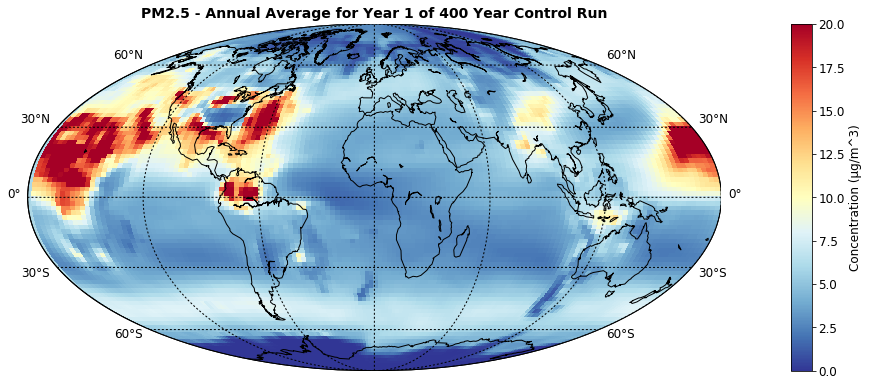

In [80]:
from mpl_toolkits.basemap import Basemap
# Make maps
fig = plt.figure(num=None, figsize=(12, 8) ) 

m = Basemap(projection='moll',lon_0=0,resolution='c')    
m.drawcoastlines()
# m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,False],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')

x, y = m(*np.meshgrid(ds.lon-180+1,ds.lat+1.75))

# plot the field using the fast pcolormesh routine 
# set the colormap 
m.pcolormesh(x,y,data[0].mean(axis=0),cmap=plt.cm.RdYlBu_r, vmin=0, vmax=20)

# Add a colorbar and title, and then show the plot.
m.colorbar(location='right', size='3%', pad='10%', label = "Concentration (\u03BCg/m^3)",) # Move colorbar over

plt.title("PM2.5 - Annual Average for Year 1 of 400 Year Control Run",fontsize=14,fontweight='bold');

plt.tight_layout()

### Calculate and plot the monthly mean variations across 400 years

#### I am working with global data - Cut data for US only

In [81]:
import datetime
from datetime import timedelta

In [82]:
# Function to find index of the nearest point to a value
def find_nearest_index(data_in,value):
    idx = (np.abs(data_in-value)).argmin()
    return int(idx)
# Function to find nearest point value
def find_nearest_element(data_in,value):
    idx = (np.abs(data_in-value)).argmin()
    return data_in[idx]

In [83]:
# US limits
top = 49.3457868 + 2# north lat
left = -124.7844079 + 180 -2 # west lon
right = -66.9513812 + 180 + 2# east lon
bottom =  24.7433195 -2 # south lat

# Index of US limits
ind_top = find_nearest_index(ds.lat, top)
ind_bottom = find_nearest_index(ds.lat, bottom)
ind_left = find_nearest_index(ds.lon, left)
ind_right = find_nearest_index(ds.lon, right)

# Values for US limits
lat_US = ds.lat[ind_bottom:ind_top]
lon_US = ds.lon[ind_left:ind_right]

# Pull out data for US
[a,b,c] = np.shape(data[1])
data_US = np.empty((a,abs(ind_bottom-ind_top),abs(ind_left-ind_right)))

data_US2 = np.empty((400*365,abs(ind_bottom-ind_top),abs(ind_left-ind_right)))

# Save out data for all 400 years
for ind in range(len(file_list)): # Year
    data_US1 = data[ind][:,ind_bottom:ind_top,ind_left:ind_right] # One year of data
    data_US2[ind*365:(ind+1)*365,:,:] = data_US1 # All years

# Create date time array
t = np.arange(datetime.date(2000,1,1),datetime.date(2000,12,31),timedelta(days = 1))
time = np.tile(t,400)

# Convert data to xarray
data_US = xr.DataArray(data_US2, dims = ['time','lat','lon'], coords = {'time': time,'lat':lat_US, 'lon': lon_US})
data_US.attrs['units'] = '\u03BCg/m^3'
data_US.attrs['standard_name'] = 'PM2.5_400YrControlRun'
data_US

<xarray.DataArray (time: 146000, lat: 14, lon: 25)>
array([[[ 12.81618 ,   8.140748, ...,  12.595994,  12.165591],
        [ 11.150306,   7.097403, ...,   9.469979,   7.890174],
        ..., 
        [  2.65093 ,   2.784766, ...,   0.598737,   0.372792],
        [  2.44164 ,   2.776447, ...,   0.482988,   0.258004]],

       [[  9.982892,   6.281556, ...,  13.783827,  12.400678],
        [ 10.400425,   8.167809, ...,  13.295541,  11.08405 ],
        ..., 
        [  1.104418,   1.245407, ...,   1.695899,   1.980989],
        [  0.966318,   1.098403, ...,   1.38528 ,   1.931534]],

       ..., 
       [[ 23.277611,  12.930137, ...,  18.709342,  18.762615],
        [ 19.1095  ,   9.151472, ...,  10.388248,  10.148543],
        ..., 
        [  0.643587,   0.492387, ...,   0.540211,   0.43345 ],
        [  0.745014,   0.774579, ...,   0.168407,   0.29918 ]],

       [[ 25.446479,  12.538322, ...,  21.734545,  23.908576],
        [ 12.315186,  10.135685, ...,  10.289041,  11.608879],
     

#### Find monthly averages

In [84]:
time = pd.date_range('2000-01-01', '2000-12-31', freq = 'D')

In [85]:
# Find monthly average
# data_US_avg.resample('M',dim='time',how='mean')
data_US_avg = np.empty([len(file_list),12])
for ind in range(len(file_list)): # Year
    data_US_avg[ind,:] = data_US[ind*365:(ind+1)*365].resample(time="M").mean() # Monthly mean for each year
data_US_avg_allyrs = data_US_avg.mean(axis = 0) # Mean across all 400 years

/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


In [86]:
np.shape(data_US_avg)

(400, 12)

In [87]:
np.shape(data_US_avg_allyrs)

(12,)

#### Plot monthly means across all 400 years

In [88]:
# Set 12 colors
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 12))

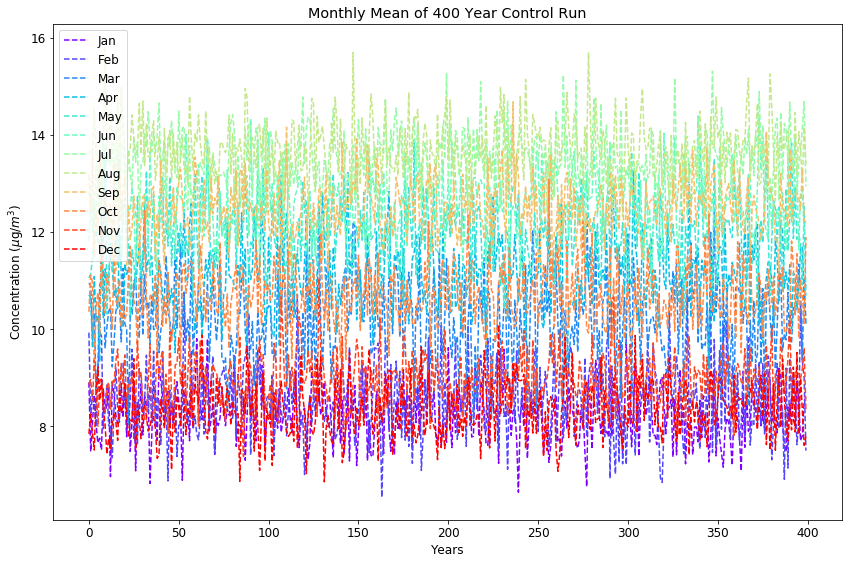

In [89]:
# Plot monthly mean for 400 years
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # For legend labels

count = -1
for m in months:
    count+=1
    plt.plot(data_US_avg[:,count],'--',label = m, color = colors[count])
plt.legend(loc = 'best')

# Axes
plt.xlabel('Years')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Monthly Mean of 400 Year Control Run')
# plt.savefig('MonthlyMean_Control.png')
plt.tight_layout()

#### Plot 400 year monthly averages with the errorbars as standard deviation

In [90]:
# Find the standard deviation
data_US_avg_std = data_US_avg.std(axis=0)

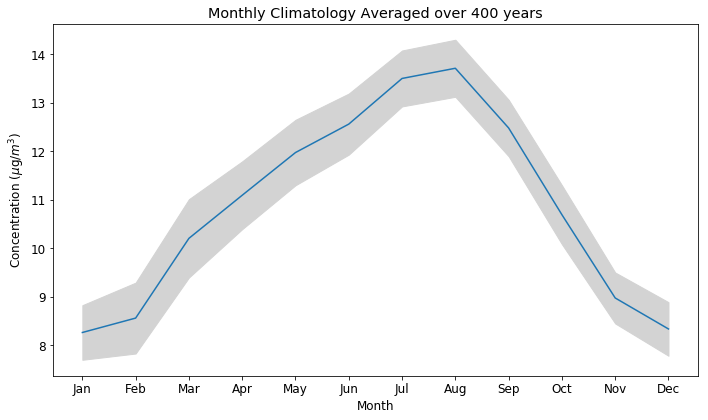

In [91]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # For legend labels

# Plot data
fig = plt.figure(figsize=(10,6))
plt.plot(data_US_avg_allyrs)

# Plot errorbars
x = np.arange(12)
plt.fill_between(x,data_US_avg_allyrs - data_US_avg_std,data_US_avg_allyrs + data_US_avg_std, color = 'lightgray')

# # Plot monthly climatology
# plt.plot(data_US_avg_allyrs)
plt.legend(loc = 'best')

# Axes
x = range(12)
plt.xticks(x,months) #, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Monthly Climatology Averaged over 400 years')

plt.tight_layout()

# plt.savefig('MonthlyMean_Control.png')

#### Map monthly averages across all 400 years

In [92]:
### Data for mapping
# Control
test_data = np.empty([400,len(months),len(lat_US),len(lon_US)])
for ind in range(400): # Year
    test_data[ind,:,:,:] = data_US[ind*365:(ind+1)*365].resample(time="M").mean(axis=0) # Monthly mean for each year
data_map = test_data.mean(axis = 0)

/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


In [93]:
# Check that we are averaging the dimensions we want to 
print(test_data.shape)
print(data_map.shape)
# Check over US averages - See that they make sense

print('Average')
for x1 in range(len(months)):
    print(data_map[x1].mean())
print('Min')
for x1 in range(len(months)):
    print(data_map[x1].min())
print('Max')
for x1 in range(len(months)):
    print(data_map[x1].max())

print('US Average')
print(data_map.mean())

(400, 12, 14, 25)
(12, 14, 25)
Average
8.26684796105
8.5640797984
10.2082139475
11.0970467683
11.9776303662
12.564079461
13.5054133669
13.7156098434
12.4843331377
10.6959998925
8.97884679501
8.33965572495
Min
0.370412186847
0.632086888873
1.55190102524
2.21398628812
2.43775731568
2.42767720504
2.10549545654
2.11183081998
1.64159034134
0.875404034272
0.50597892115
0.287525849224
Max
30.5608934255
30.6398899292
43.2579205063
27.6143854033
28.3605240927
34.622250306
42.8628390279
42.1592926748
38.539519073
34.8226265517
29.5161622601
28.0683420224
US Average
10.8664797552


  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
100%|██████████| 12/12 [00:32<00:00,  2.71s/it]


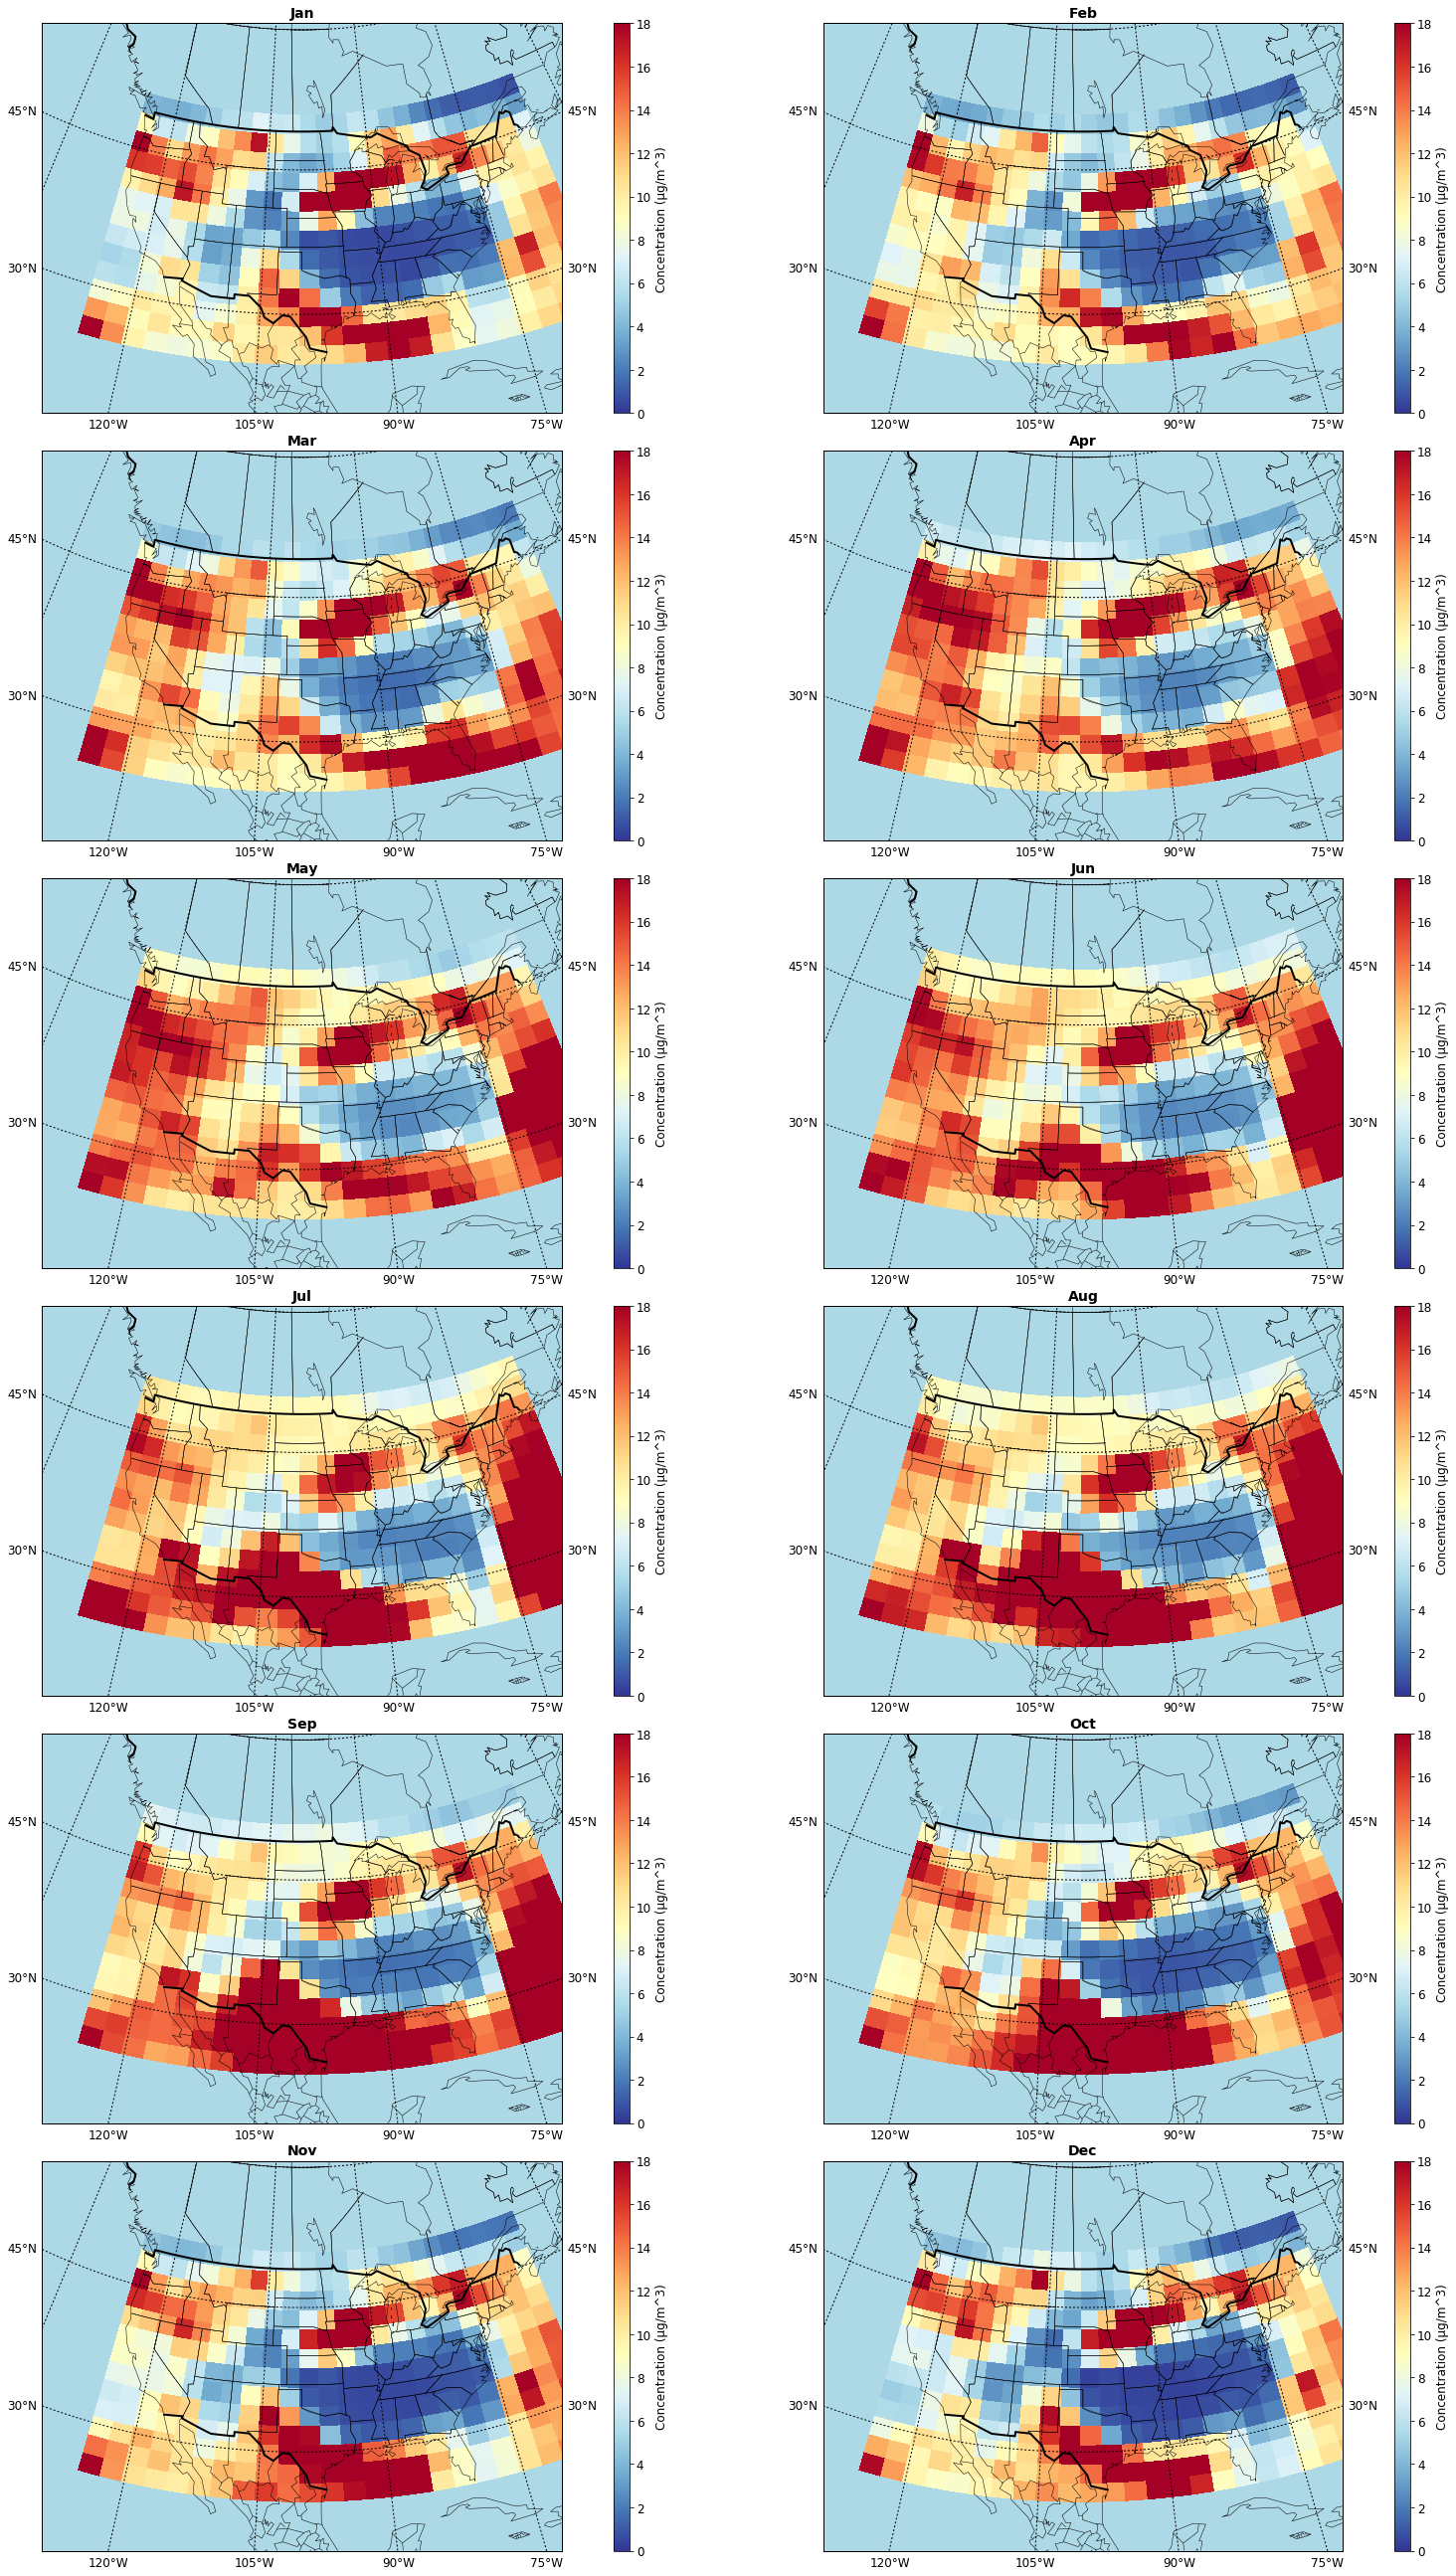

In [94]:
## from mpl_toolkits.basemap import Basemap
# Make maps
fig = plt.figure(num=None, figsize=(24,36)) 

for m1 in tqdm(range(len(months))):
    ax1 = fig.add_subplot(6,2,m1+1) # Map average of each month through the 400 years
    ### Control
    # Miller projection:
    m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
    m.drawcoastlines(linewidth=0.5)
    # m.fillcontinents(color='tan',lake_color='lightblue')
    # draw parallels and meridians.
    m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
    m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
    m.drawmapboundary(fill_color='lightblue')
    m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
    m.drawstates(linewidth=0.5, linestyle='solid', color='k')

    x, y = m(*np.meshgrid(lon_US-180+1,lat_US+1.75))

    # Add a colorbar and title, and then show the plot.
    # plot the field using the fast pcolormesh routine 
    # set the colormap (and reverse direction)
    m.pcolormesh(x,y,data_map[m1],cmap=plt.cm.RdYlBu_r, vmin=0, vmax=18)
    m.colorbar(location='right', size='3%', pad='10%', label = "Concentration (\u03BCg/m^3)",) # Move colorbar over
    plt.title(months[m1],fontsize=14,fontweight='bold');

plt.tight_layout()

#### Map 400 year average over US

In [95]:
### Data for mapping
# Control
test_data = np.empty([400,len(lat_US),len(lon_US)])
for ind in range(len(file_list)): # Year
    test_data[ind,:,:] = data_US[ind*365:(ind+1)*365].resample(time="Y").mean(axis=0) # Monthly mean for each year
data_map = test_data.mean(axis=0)

/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


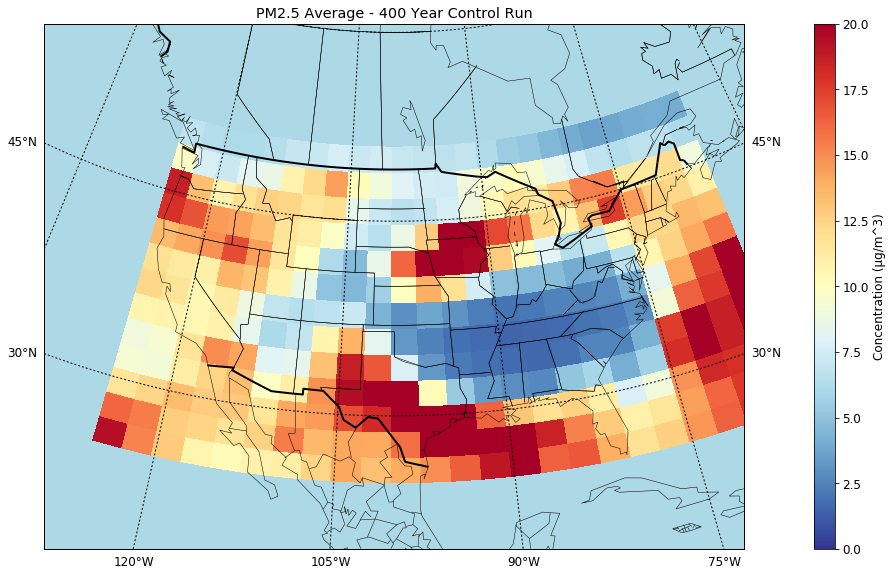

In [96]:
from mpl_toolkits.basemap import Basemap
# Make maps
fig = plt.figure(num=None, figsize=(12, 8) ) 

### Control
# Miller projection:
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
# m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')

x, y = m(*np.meshgrid(lon_US-180+1,lat_US+1.75))

# Add a colorbar and title, and then show the plot.
# plot the field using the fast pcolormesh routine 
# set the colormap 
m.pcolormesh(x,y,data_map,cmap=plt.cm.RdYlBu_r, vmin=0, vmax=20)
m.colorbar(location='right', size='3%', pad='10%', label = "Concentration (\u03BCg/m^3)",) # Move colorbar over
plt.title('PM2.5 Average - 400 Year Control Run');

plt.tight_layout()


##  Compare Control RCP 8.5 Scenario
This is a run in which only climate is changing (aerosol held constant at 2005 levels)

Data is daily data stored in 5 year chunks - Format is not the same as the control run

Years: 2006-2100

#### First look at the data

In [97]:
source_dir1 = '/d2jsb/data/GFDL/CM3/CM3Z_H1_2006-2100_RCP85_2005AerO3_Z1star/pp/atmos/ts/daily/5yr'
file_list1 = glob.glob(source_dir1 + '/*.pm25.nc')
data_RCP85 = []
ds = xr.open_dataset(file_path, decode_times=False, engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 90, lon: 144, pfull: 1, phalf: 49, time: 365)
Coordinates:
  * lat          (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 ...
  * lon          (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
  * pfull        (pfull) float64 996.1
  * phalf        (phalf) float64 0.01 0.02697 0.05171 0.08895 0.1425 0.2207 ...
  * time         (time) float64 1.456e+05 1.456e+05 1.456e+05 1.456e+05 ...
Dimensions without coordinates: bnds
Data variables:
    average_DT   (time) float64 ...
    average_T1   (time) float64 ...
    average_T2   (time) float64 ...
    lat_bnds     (lat, bnds) float64 ...
    lon_bnds     (lon, bnds) float64 ...
    pm25         (time, pfull, lat, lon) float64 ...
    time_bounds  (time, bnds) float64 ...
Attributes:
    filename:      atmos.04000101-04001231.pm25.nc
    title:         CM3.2_Control-2000
    grid_type:     regular
    grid_tile:     N/A
    history:       Fri Nov  3 18:57:42 2017: ncks -O

In [98]:
np.shape(ds.pm25)

(365, 1, 90, 144)

In [99]:
np.squeeze(ds.pm25[:,-1,:,:])*1e9 # Only pull out the last ref full pressure level - Surface

<xarray.DataArray 'pm25' (time: 365, lat: 90, lon: 144)>
array([[[ 0.004762,  0.004573, ...,  0.005141,  0.004952],
        [ 0.012405,  0.011603, ...,  0.014027,  0.013214],
        ..., 
        [-0.018712,  0.049007, ..., -0.15744 , -0.087552],
        [-0.141391, -0.130635, ..., -0.162902, -0.152146]],

       [[ 0.00877 ,  0.008689, ...,  0.008931,  0.00885 ],
        [ 0.010081,  0.009801, ...,  0.010647,  0.010363],
        ..., 
        [ 0.496255,  0.56082 , ...,  0.364554,  0.430816],
        [ 0.363459,  0.381983, ...,  0.326411,  0.344935]],

       ..., 
       [[ 0.009854,  0.009826, ...,  0.009909,  0.009881],
        [ 0.007253,  0.007262, ...,  0.007238,  0.007245],
        ..., 
        [ 0.825112,  0.893182, ...,  0.688157,  0.75676 ],
        [ 1.419615,  1.437955, ...,  1.382934,  1.401274]],

       [[ 0.004865,  0.004842, ...,  0.00491 ,  0.004887],
        [ 0.004557,  0.004568, ...,  0.004535,  0.004547],
        ..., 
        [ 1.287927,  1.31635 , ...,  1.232

#### Read in data

In [100]:
# Read in and save out all the PM2.5 data from the historical run (H1, Z1*) - Data comes in 5 year chunks
import glob as glob
source_dir1 = '/d2jsb/data/GFDL/CM3/CM3Z_H1_2006-2100_RCP85_2005AerO3_Z1star/pp/atmos/ts/daily/5yr'
file_list1 = sorted(glob.glob(source_dir1 + '/*.pm25.nc')) # Year does matter here - Sort list of files
data_RCP85 = []
for file_path1 in tqdm(file_list1):
    ds1 = xr.open_dataset(file_path1, decode_times=False, engine='netcdf4')
    # Pull out the top layer only
    data_RCP85.append(np.squeeze(ds1.pm25[:,-1,:,:])*1e9) # Pull out only PM2.5 data. Convert kg/m3 to ug/m3

100%|██████████| 19/19 [00:07<00:00,  2.48it/s]


In [101]:
data_RCP85[0]

<xarray.DataArray 'pm25' (time: 1825, lat: 90, lon: 144)>
array([[[  5.604099e-03,   5.601247e-03, ...,   5.609802e-03,   5.606950e-03],
        [  1.588059e-02,   1.563651e-02, ...,   1.637531e-02,   1.612693e-02],
        ..., 
        [  5.456632e+00,   5.778963e+00, ...,   4.834087e+00,   5.141871e+00],
        [  9.200440e+00,   9.531232e+00, ...,   8.538854e+00,   8.869647e+00]],

       [[  5.371772e-03,   5.322120e-03, ...,   5.471075e-03,   5.421423e-03],
        [  1.181507e-02,   1.121308e-02, ...,   1.305735e-02,   1.243009e-02],
        ..., 
        [  1.194968e+01,   1.240923e+01, ...,   1.102405e+01,   1.148787e+01],
        [  1.691618e+01,   1.700920e+01, ...,   1.673016e+01,   1.682317e+01]],

       ..., 
       [[  3.741564e-02,   3.745077e-02, ...,   3.734538e-02,   3.738051e-02],
        [  3.963082e-02,   4.099724e-02, ...,   3.682092e-02,   3.823810e-02],
        ..., 
        [  2.703367e-01,   2.669029e-01, ...,   2.774550e-01,   2.738557e-01],
        [  2.9

In [102]:
ds1.time

<xarray.DataArray 'time' (time: 1825)>
array([ 32850.5,  32851.5,  32852.5, ...,  34672.5,  34673.5,  34674.5])
Coordinates:
  * time     (time) float64 3.285e+04 3.285e+04 3.285e+04 3.285e+04 ...
Attributes:
    long_name:       time
    units:           days since 2006-01-01 00:00:00
    cartesian_axis:  T
    calendar_type:   NOLEAP
    calendar:        NOLEAP
    bounds:          time_bounds

#### Cut data for US only

In [103]:
# US limits
top = 49.3457868+2 # north lat
left = -124.7844079-2 + 180 # west lon
right = -66.9513812+2 + 180 # east lon
bottom =  24.7433195-2 # south lat

# Index of US limits
ind_top = find_nearest_index(ds1.lat, top)
ind_bottom = find_nearest_index(ds1.lat, bottom)
ind_left = find_nearest_index(ds1.lon, left)
ind_right = find_nearest_index(ds1.lon, right)

# Values for US limits
lat_US = ds1.lat[ind_bottom:ind_top]
lon_US = ds1.lon[ind_left:ind_right]


# Pull out data for US
[a,b,c] = np.shape(data_RCP85[1])
data_US_RCP85 = np.empty((a,abs(ind_bottom-ind_top),abs(ind_left-ind_right)))

len_yr = 2100-2005 # Number of years of data
data_US2_RCP85 = np.empty((len_yr*365,abs(ind_bottom-ind_top),abs(ind_left-ind_right)))

# Save out data for all years
for ind in range(len(file_list1)): # Number of years
    data_US1_RCP85 = data_RCP85[ind][:,ind_bottom:ind_top,ind_left:ind_right] # One year of data
    data_US2_RCP85[ind*365*5:(ind+1)*365*5,:,:] = data_US1_RCP85 # All years

# Create date time array - Ignore the extra day on leap years (Model does not have leap years)
dates = pd.date_range('2006-01-01','2100-12-31', freq = 'D')

leap = []
for each in dates:
    if each.month==2 and each.day ==29:
        leap.append(each)

time = dates.drop(leap)

# Convert data to xarray
data_US_RCP85 = xr.DataArray(data_US2_RCP85, dims = ['time','lat','lon'], coords = {'time': time,'lat':lat_US, 'lon': lon_US})
data_US_RCP85.attrs['units'] = '\u03BCg/m^3'
data_US_RCP85.attrs['standard_name'] = 'PM2.5_400YrControlRun'
print(data_US_RCP85.shape)

(34675, 14, 25)


#### Find monthly means across 2006-2100

In [104]:
# Find monthly average
data_US_avg_RCP85 = np.empty([len(file_list1)*5,12])
for ind in range(len(file_list1)*5): # Year
    data_US_avg_RCP85[ind,:] = data_US_RCP85[ind*365:(ind+1)*365].resample(time="M").mean() # Monthly mean for each year
data_US_avg_allyrs_RCP85 = data_US_avg_RCP85.mean(axis = 0) # Mean across all 400 years


# data_US_avg_RCP85 = data_US_RCP85[ind*365:(ind+1)*365].resample(time="M").mean() # Monthly average
# data_US_avg_allyrs_RCP85 = data_US_avg_RCP85.mean() # Mean across all 400 years

/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


In [105]:
data_US_RCP85.shape

(34675, 14, 25)

In [106]:
data_US_avg_RCP85.shape

(95, 12)

In [107]:
data_US_avg_allyrs_RCP85.shape

(12,)

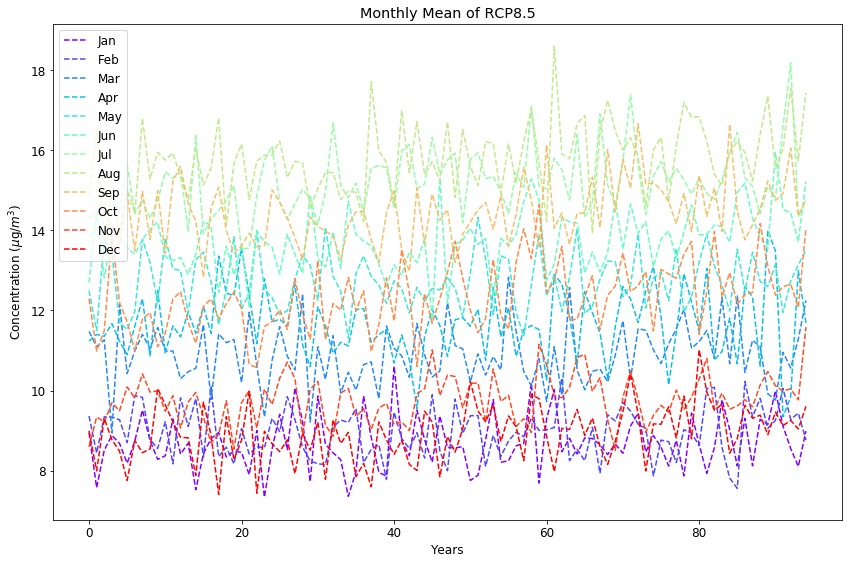

In [108]:
# Plot monthly mean 
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # For legend labels

count = -1
for m in months:
    count+=1
    plt.plot(data_US_avg_RCP85[:,count],'--',label = m, color = colors[count])
plt.legend(loc = 'best')

# Axes
plt.xlabel('Years')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Monthly Mean of RCP8.5')
# plt.savefig('MonthlyMean_Control.png')
plt.tight_layout()

#### Compare to Control

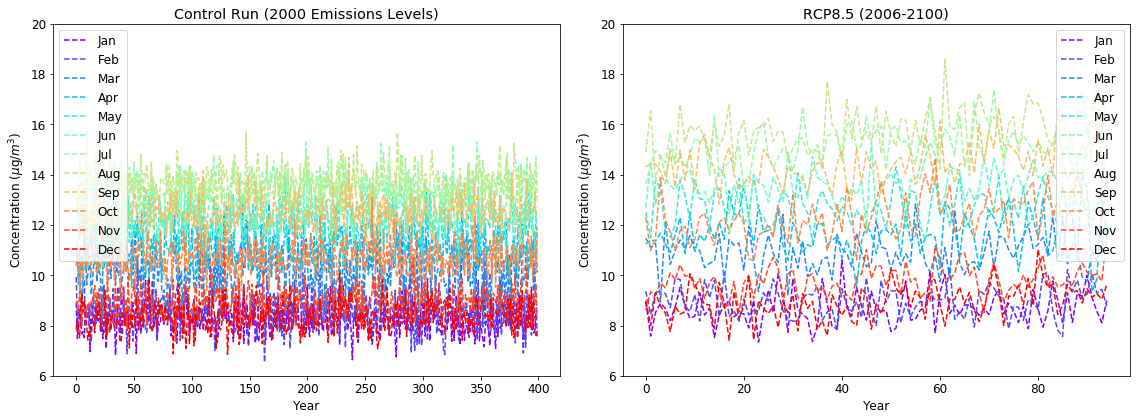

In [109]:
fig = plt.figure(figsize=(16,6))
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # For legend labels

# Control
ax1 = fig.add_subplot(121)

count = -1
for m in months:
    count+=1
    plt.plot(data_US_avg[:,count],'--',label = m, color = colors[count])
plt.ylim([6,20])

plt.xlabel('Year')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Control Run (2000 Emissions Levels)')
plt.legend(loc = 'best')

# RCP 8.5
ax2 = fig.add_subplot(122)

count = -1
for m in months:
    count+=1
    plt.plot(data_US_avg_RCP85[:,count],'--',label = m, color = colors[count])
plt.ylim([6,20])

plt.xlabel('Year')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('RCP8.5 (2006-2100)')
plt.legend(loc = 'best')

plt.tight_layout()

#### Plot 400 year monthly averages with the errorbars as standard deviation

In [110]:
# Find the standard deviation
data_US_avg_std_RCP85 = data_US_avg_RCP85.std(axis=0)

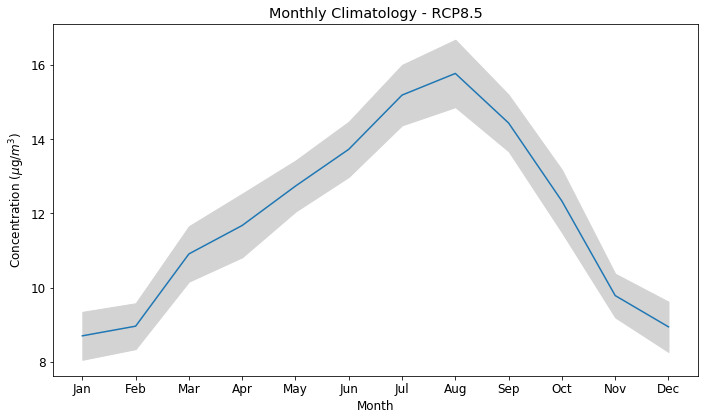

In [111]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # For legend labels

# Plot data
fig = plt.figure(figsize=(10,6))
plt.plot(data_US_avg_allyrs_RCP85)

# Plot errorbars
x = np.arange(12)
plt.fill_between(x,data_US_avg_allyrs_RCP85 - data_US_avg_std_RCP85,
                 data_US_avg_allyrs_RCP85 + data_US_avg_std_RCP85, color = 'lightgray')

# # Plot monthly climatology
# plt.plot(data_US_avg_allyrs)
plt.legend(loc = 'best')

# Axes
x = range(12)
plt.xticks(x,months) #, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Monthly Climatology - RCP8.5')

plt.tight_layout()

# plt.savefig('MonthlyMean_Control.png')

#### Compare to Control

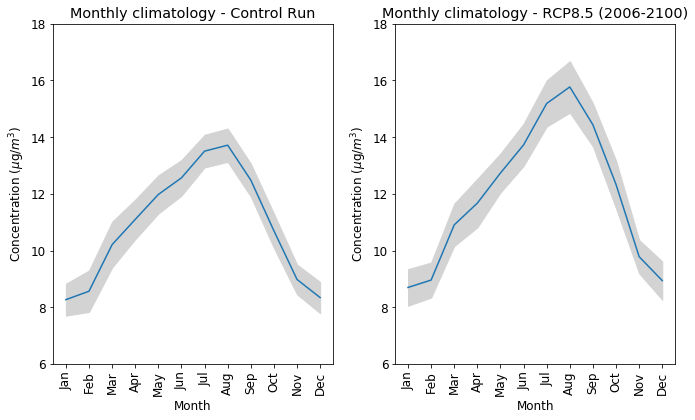

In [112]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(121)
ax1.plot(data_US_avg_allyrs)
x = range(12)
plt.xticks(x,months, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Monthly climatology - Control Run')
# Plot errorbars
x = np.arange(12)
plt.fill_between(x,data_US_avg_allyrs - data_US_avg_std,
                 data_US_avg_allyrs + data_US_avg_std, color = 'lightgray')
plt.ylim([6,18])

ax2 = fig.add_subplot(122)
ax2.plot(data_US_avg_allyrs_RCP85)
x = range(12)
plt.xticks(x,months, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Monthly climatology - RCP8.5 (2006-2100)')
# Plot errorbars
x = np.arange(12)
plt.fill_between(x,data_US_avg_allyrs_RCP85 - data_US_avg_std_RCP85,
                 data_US_avg_allyrs_RCP85 + data_US_avg_std_RCP85, color = 'lightgray')
plt.ylim([6,18])

plt.tight_layout()

In [113]:
len(file_list)

400

#### Find annual average

In [114]:
# Control
data_US_avg_ann = np.empty([len(file_list)])
for ind in range(len(file_list)): # Year
    data_US_avg_ann[ind] = data_US[ind*365:(ind+1)*365].resample(time="Y").mean() # Monthly mean for each year

# RCP 8.5
data_US_avg_ann_RCP85 = data_US_RCP85.resample(time="Y").mean()

/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


In [115]:
print(data_US_avg_ann.shape)
print(data_US_avg_ann_RCP85.shape)

(400,)
(95,)


#### Find the standard deviation

In [116]:
# Control
data_US_avg_std_ann = np.empty([len(file_list)])
for ind in range(len(file_list)): # Year
    data_US_avg_std_ann[ind] = data_US[ind*365:(ind+1)*365].resample(time="Y").std() # Monthly mean for each year
# RCP 8.5
data_US_avg_std_ann_RCP85 = data_US_RCP85.resample(time="Y").std()

/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


In [117]:
print(data_US_avg_std_ann.shape)
print(data_US_avg_std_ann_RCP85.shape)

(400,)
(95,)


#### Plot and compare to control

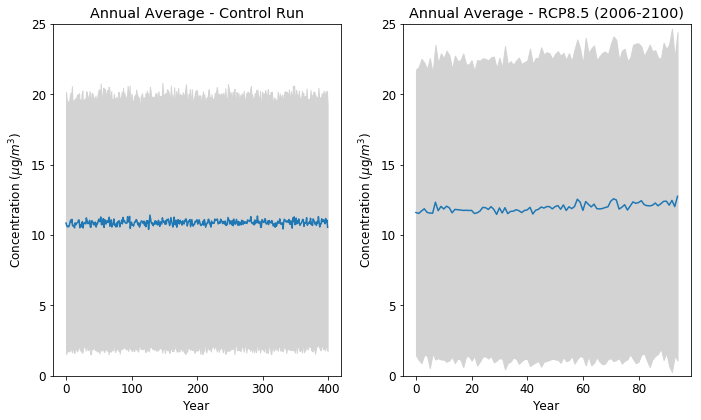

In [118]:
fig = plt.figure(figsize=(10,6))

# Control
ax1 = fig.add_subplot(121)
ax1.plot(data_US_avg_ann)
plt.xlabel('Year')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Annual Average - Control Run')
# Plot errorbars
x = np.arange(len(data_US_avg_ann))
plt.fill_between(x,data_US_avg_ann - data_US_avg_std_ann, 
                 data_US_avg_ann + data_US_avg_std_ann, color = 'lightgray')
plt.ylim([0,25])
# plt.plot(np.unique(data_US_avg_ann), np.poly1d(np.polyfit(x, data_US_avg_ann, 1))(np.unique(data_US_avg_ann))) # Line of best fit

# RCP 8.5
ax2 = fig.add_subplot(122)
ax2.plot(data_US_avg_ann_RCP85)
plt.xlabel('Year')
plt.ylabel('Concentration ($\u03BC$g/$m^3$)')
plt.title('Annual Average - RCP8.5 (2006-2100)')
# Plot errorbars
x = np.arange(len(data_US_avg_ann_RCP85))
plt.fill_between(x,data_US_avg_ann_RCP85 - data_US_avg_std_ann_RCP85,
                 data_US_avg_ann_RCP85 + data_US_avg_std_ann_RCP85, color = 'lightgray')
plt.ylim([0,25])
# plt.plot(data_US_avg_ann_RCP85, np.poly1d(np.polyfit(x, data_US_avg_ann_RCP85, 1))(data_US_avg_ann_RCP85)) # Line of best fit

plt.tight_layout()

#### Map monthly climatology

In [119]:
### Data for mapping
# Control
data_map = data_US_RCP85.groupby('time.month').mean(axis=0) # Monthly mean for each year

In [120]:
# Check that we are averaging the dimensions we want to 
print(data_map.shape)
print(data_map.max())

(12, 14, 25)
<xarray.DataArray ()>
array(64.45383862351719)


  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
100%|██████████| 12/12 [00:32<00:00,  2.71s/it]


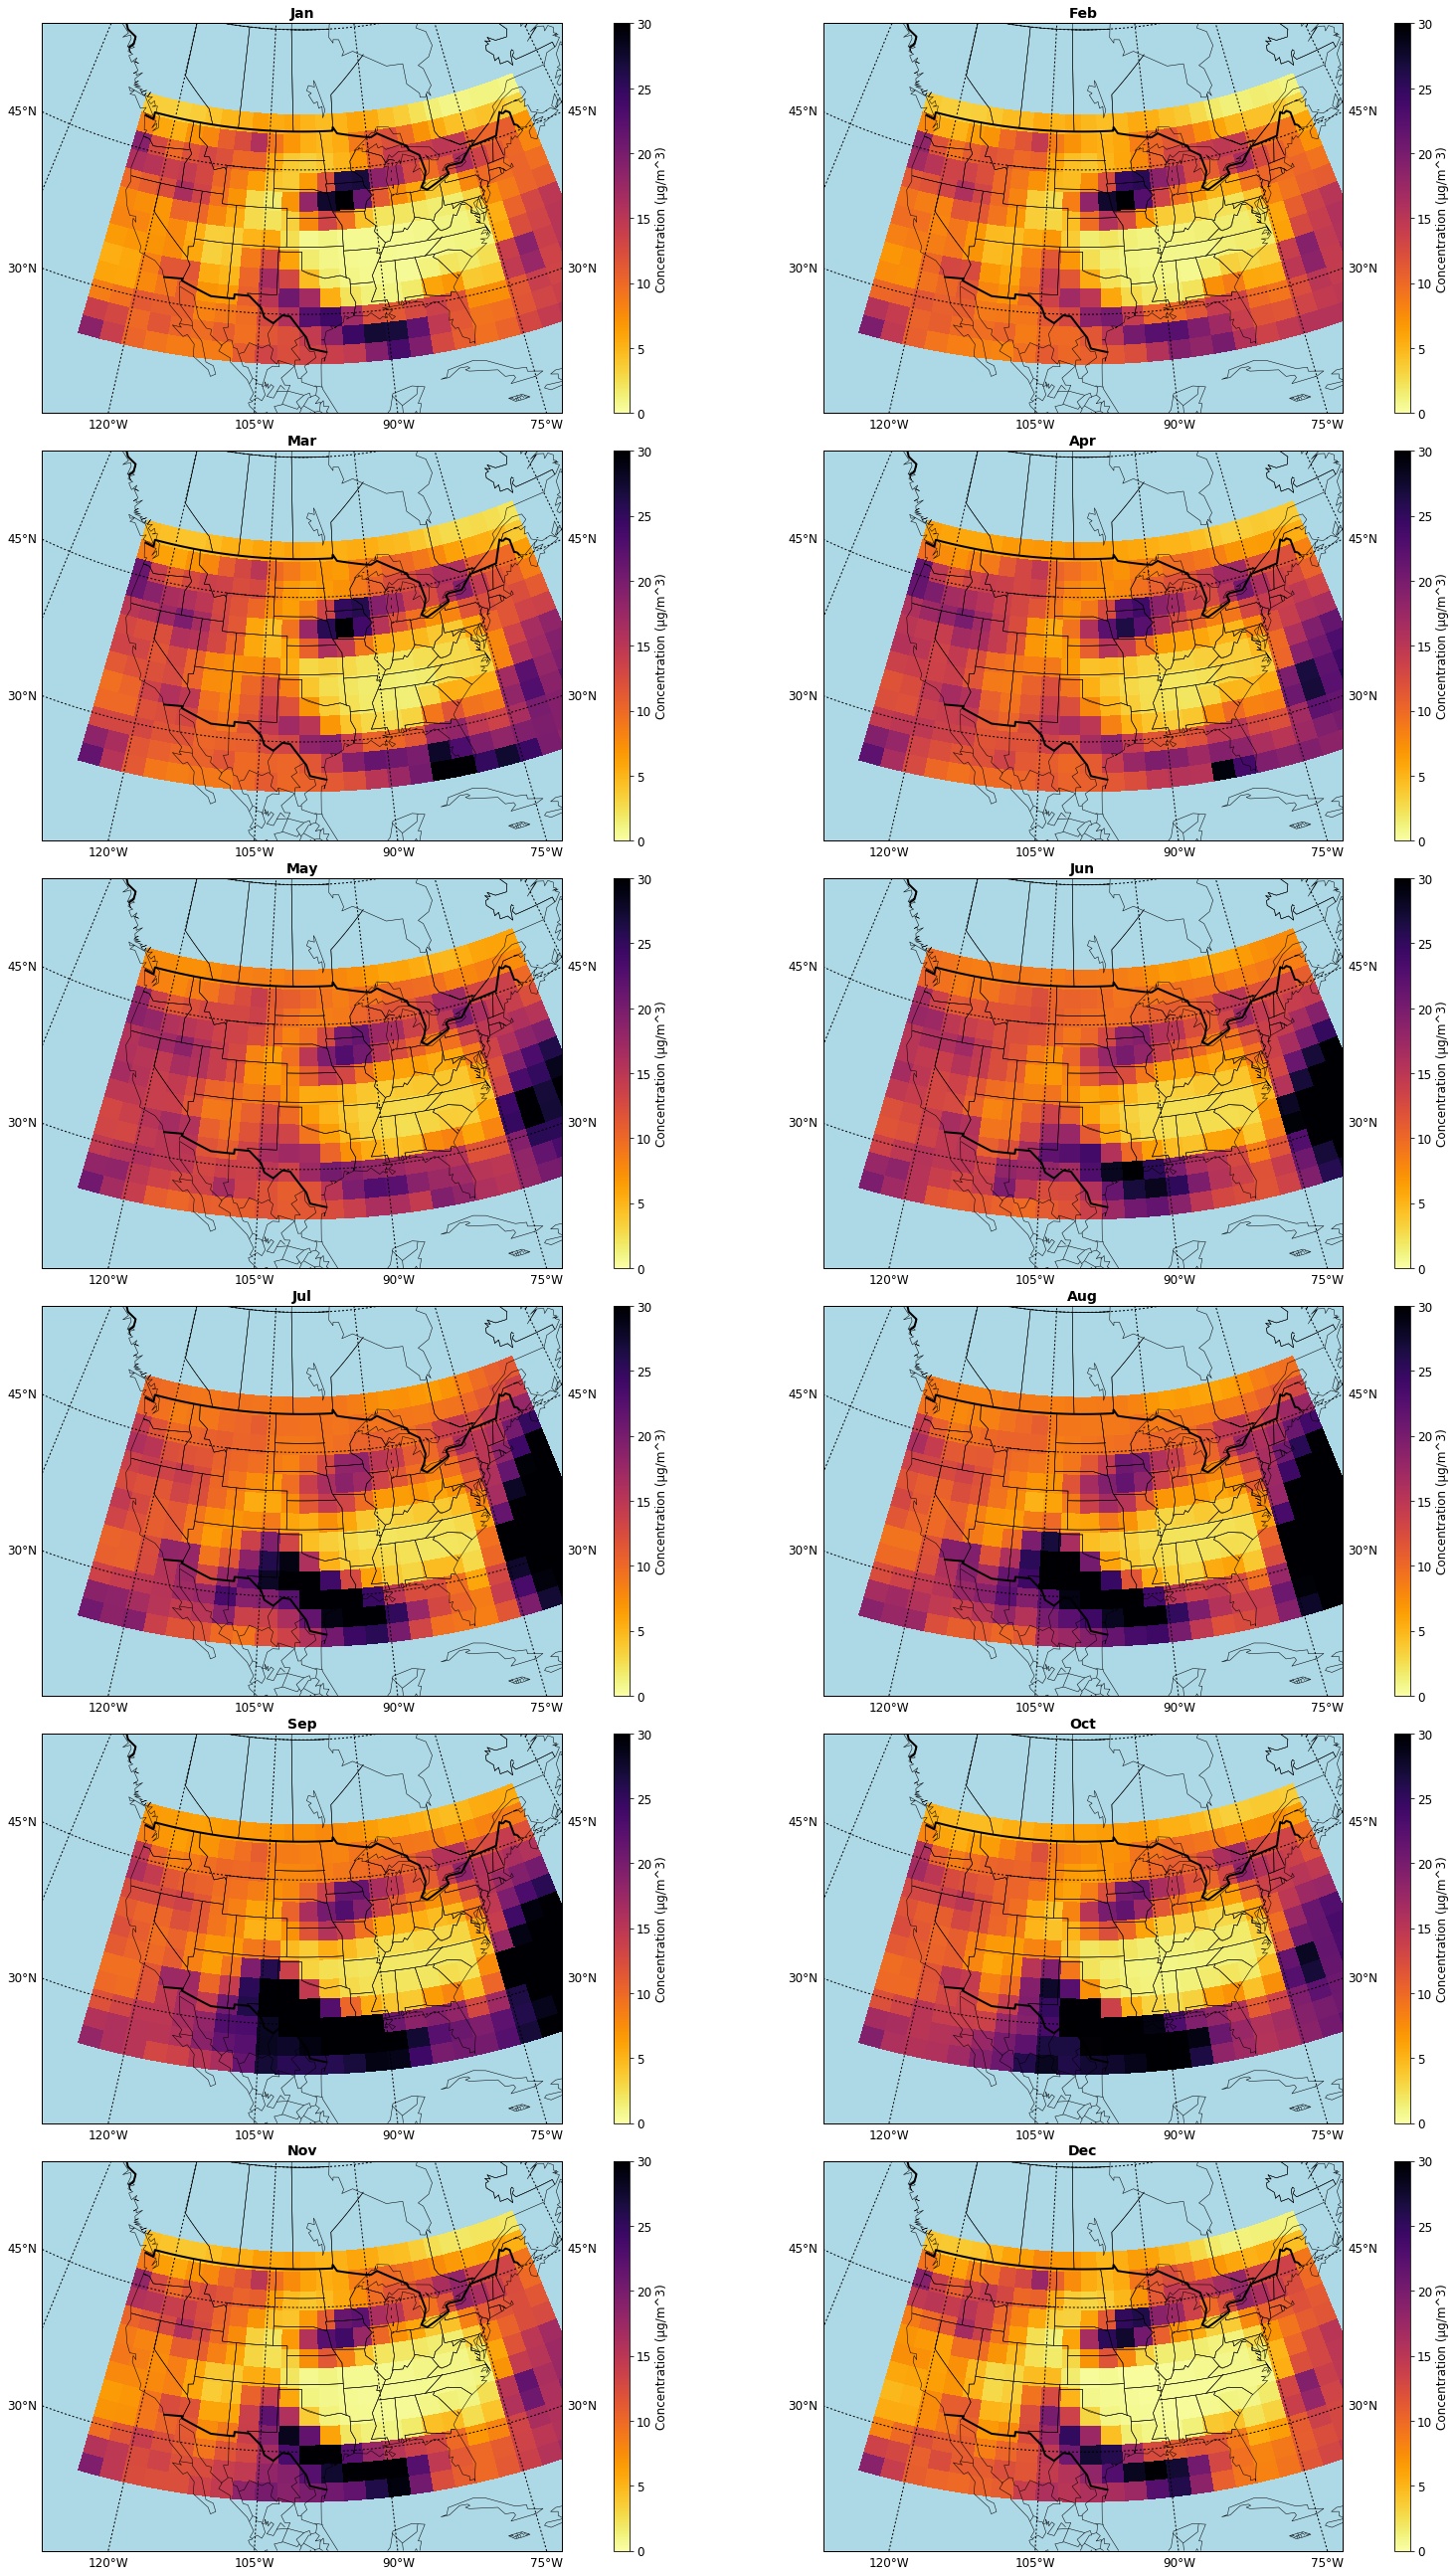

In [121]:
## from mpl_toolkits.basemap import Basemap
# Make maps
fig = plt.figure(num=None, figsize=(24,36)) 

for m1 in tqdm(range(len(months))):
    ax1 = fig.add_subplot(6,2,m1+1) # Map average of each month through the 400 years
    ### Control
    # Miller projection:
    m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
    m.drawcoastlines(linewidth=0.5)
    # m.fillcontinents(color='tan',lake_color='lightblue')
    # draw parallels and meridians.
    m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
    m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
    m.drawmapboundary(fill_color='lightblue')
    m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
    m.drawstates(linewidth=0.5, linestyle='solid', color='k')

    x, y = m(*np.meshgrid(lon_US-180+1,lat_US+1.75))

    # Add a colorbar and title, and then show the plot.
    # plot the field using the fast pcolormesh routine 
    # set the colormap (and reverse direction)
    m.pcolormesh(x,y,data_map[m1],cmap=plt.cm.inferno_r, vmin=0, vmax=30)
    m.colorbar(location='right', size='3%', pad='10%', label = "Concentration (\u03BCg/m^3)",) # Move colorbar over
    plt.title(months[m1],fontsize=14,fontweight='bold');

plt.tight_layout()

/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)
/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


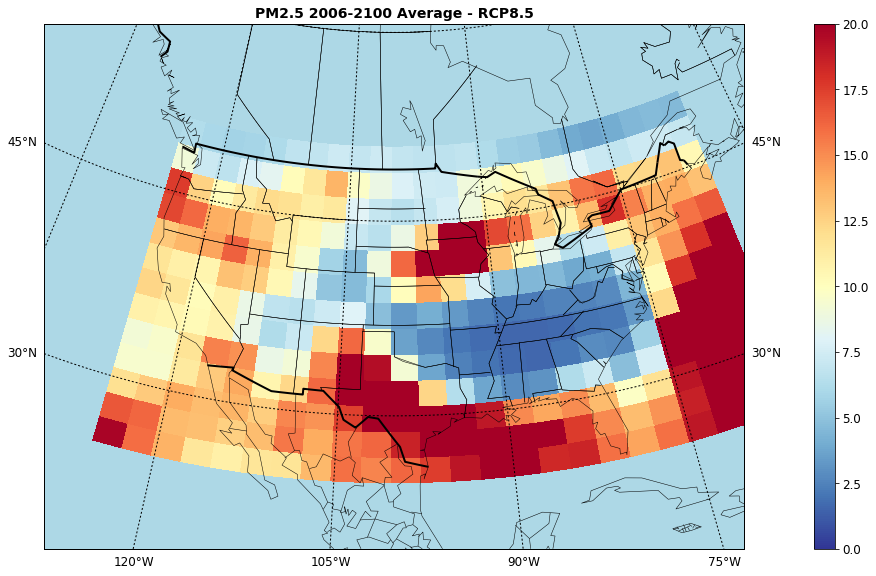

In [122]:
### RCP 8.5
test_data1 = data_US_RCP85.resample(time="Y").mean(axis=0) # Monthly mean for each year
data_map_RCP85 = test_data1.mean(axis=0)

fig = plt.figure(num=None, figsize=(12, 8) ) 
# Miller projection:
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
# m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')

x, y = m(*np.meshgrid(lon_US-180+1,lat_US+1.75))

# plot the field using the fast pcolormesh routine 
# set the colormap 
m.pcolormesh(x,y,data_map_RCP85,cmap=plt.cm.RdYlBu_r, vmin=0, vmax=20)

m.colorbar(location='right', size='3%', pad='10%') # Move colorbar over

# Add a colorbar and title, and then show the plot.
plt.title('PM2.5 2006-2100 Average - RCP8.5',fontsize=14,fontweight='bold');

plt.tight_layout()